In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [56]:
df=pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [58]:
df.rename(columns={'person_age':'age','person_gender':'gender', 'person_education':'education', 'person_income':'income', 'person_emp_exp':'emp_exp', 'person_home_ownership':'home_ownership','previous_loan_defaults_on_file':'loan_default'},inplace=True)

In [59]:
df['age']=df['age'].astype('int')

In [60]:
df.isna().sum()

,0
age,0
gender,0
education,0
income,0
emp_exp,0
home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [61]:
df.head()

,age,gender,education,income,emp_exp,home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_default,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## EDA

<Axes: xlabel='loan_amnt', ylabel='Count'>

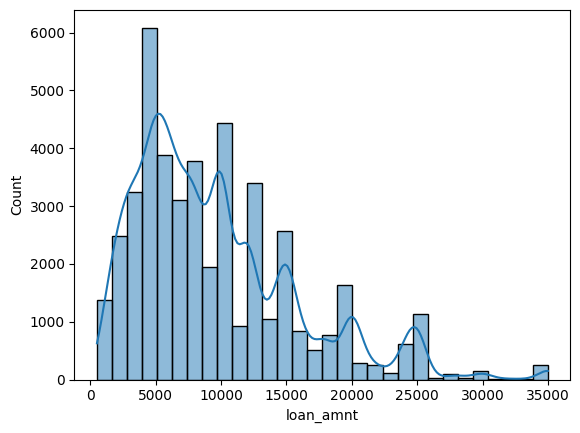

In [62]:
sns.histplot(x=df['loan_amnt'], kde=True,bins=30)

<Axes: xlabel='loan_status', ylabel='loan_int_rate'>

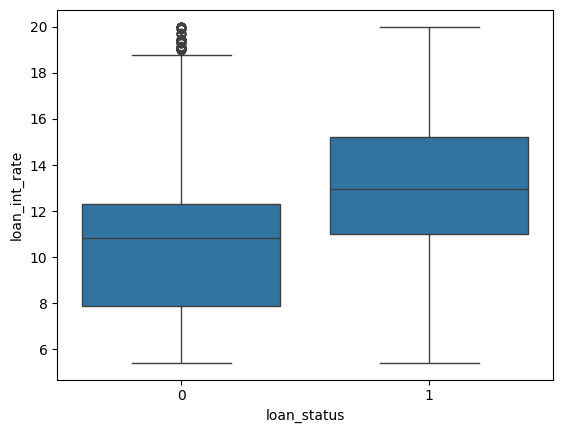

In [63]:
sns.boxplot(y=df['loan_int_rate'],x=df['loan_status'])

<Axes: xlabel='loan_status', ylabel='count'>

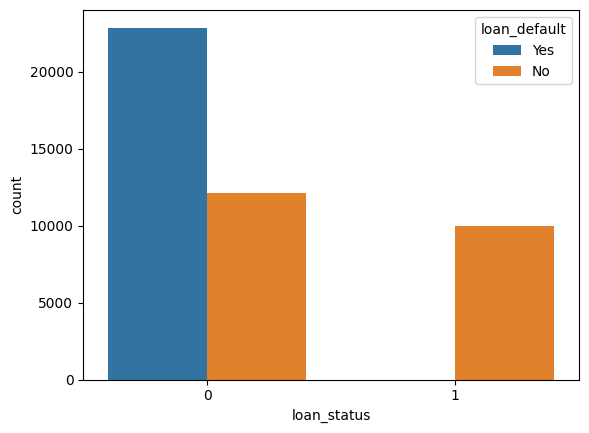

In [64]:
sns.countplot(x=df['loan_status'] , hue=df['loan_default'])

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

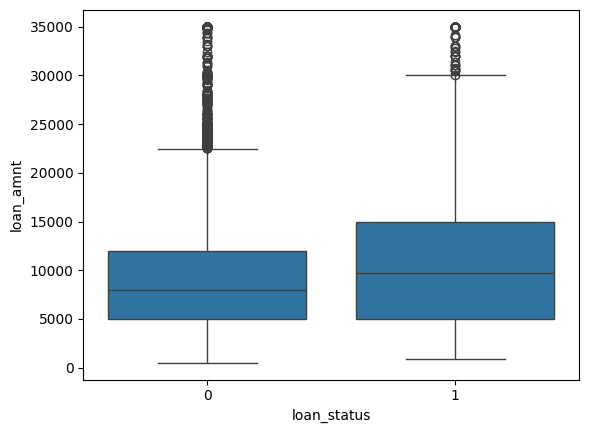

In [65]:
sns.boxplot(y=df['loan_amnt'],x=df['loan_status'])

<Axes: xlabel='loan_status', ylabel='count'>

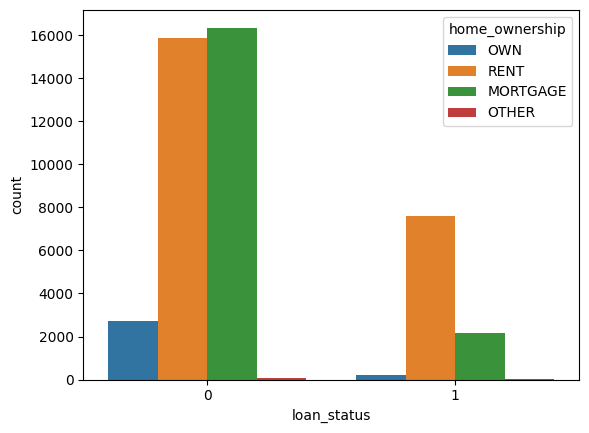

In [66]:
sns.countplot(x=df['loan_status'], hue=df['home_ownership'])

## One hot Encoding

In [67]:
df.columns

Index(['age', 'gender', 'education', 'income', 'emp_exp', 'home_ownership',
       'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'loan_default',
       'loan_status'],
      dtype='object')

In [68]:
col=['education','home_ownership','loan_intent']
df_encoded=pd.get_dummies(df,columns=col,drop_first=True)
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df_encoded

,age,gender,income,emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_default,...,education_High School,education_Master,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,female,71948.0,0,35000.0,16.02,0.49,3.0,561,No,...,0,1,0,0,1,0,0,0,1,0
1,21,female,12282.0,0,1000.0,11.14,0.08,2.0,504,Yes,...,1,0,0,1,0,1,0,0,0,0
2,25,female,12438.0,3,5500.0,12.87,0.44,3.0,635,No,...,1,0,0,0,0,0,0,1,0,0
3,23,female,79753.0,0,35000.0,15.23,0.44,2.0,675,No,...,0,0,0,0,1,0,0,1,0,0
4,24,male,66135.0,1,35000.0,14.27,0.53,4.0,586,No,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,47971.0,6,15000.0,15.66,0.31,3.0,645,No,...,0,0,0,0,1,0,0,1,0,0
44996,37,female,65800.0,17,9000.0,14.07,0.14,11.0,621,No,...,0,0,0,0,1,0,1,0,0,0
44997,33,male,56942.0,7,2771.0,10.02,0.05,10.0,668,No,...,0,0,0,0,1,0,0,0,0,0
44998,29,male,33164.0,4,12000.0,13.23,0.36,6.0,604,No,...,0,0,0,0,1,1,0,0,0,0


## Label Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [70]:
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])
df_encoded['loan_default'] = le.fit_transform(df_encoded['loan_default'])


In [71]:
df_encoded.columns

Index(['age', 'gender', 'income', 'emp_exp', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'loan_default', 'loan_status', 'education_Bachelor',
       'education_Doctorate', 'education_High School', 'education_Master',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

## Find Z-Score

In [72]:
from sklearn.preprocessing import StandardScaler

numeric_cols =['age','income','emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

scaler=StandardScaler()

In [73]:
df_encoded[numeric_cols]=scaler.fit_transform(df_encoded[numeric_cols])
df_encoded

,age,gender,income,emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_default,...,education_High School,education_Master,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-0.953538,0,-0.104090,-0.892284,4.024953,1.683039,4.016394,-0.739109,561,0,...,0,1,0,0,1,0,0,0,1,0
1,-1.118963,0,-0.846005,-0.892284,-1.359209,0.044782,-0.684829,-0.996863,504,1,...,1,0,0,1,0,1,0,0,0,0
2,-0.457264,0,-0.844065,-0.397517,-0.646600,0.625557,3.443074,-0.739109,635,0,...,1,0,0,0,0,0,0,1,0,0
3,-0.788113,0,-0.007039,-0.892284,4.024953,1.417829,3.443074,-0.996863,675,0,...,0,0,0,0,1,0,0,1,0,0
4,-0.622689,1,-0.176371,-0.727362,4.024953,1.095549,4.475050,-0.481354,586,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.126414,1,-0.402231,0.097249,0.857799,1.562184,1.952442,-0.739109,645,0,...,0,0,0,0,1,0,0,1,0,0
44996,1.527834,0,-0.180537,1.911393,-0.092348,1.028407,0.003155,1.322928,621,0,...,0,0,0,0,1,0,1,0,0,0
44997,0.866135,1,-0.290681,0.262171,-1.078758,-0.331212,-1.028821,1.065174,668,0,...,0,0,0,0,1,0,0,0,0,0
44998,0.204436,1,-0.586348,-0.232595,0.382726,0.746412,2.525762,0.034155,604,0,...,0,0,0,0,1,1,0,0,0,0


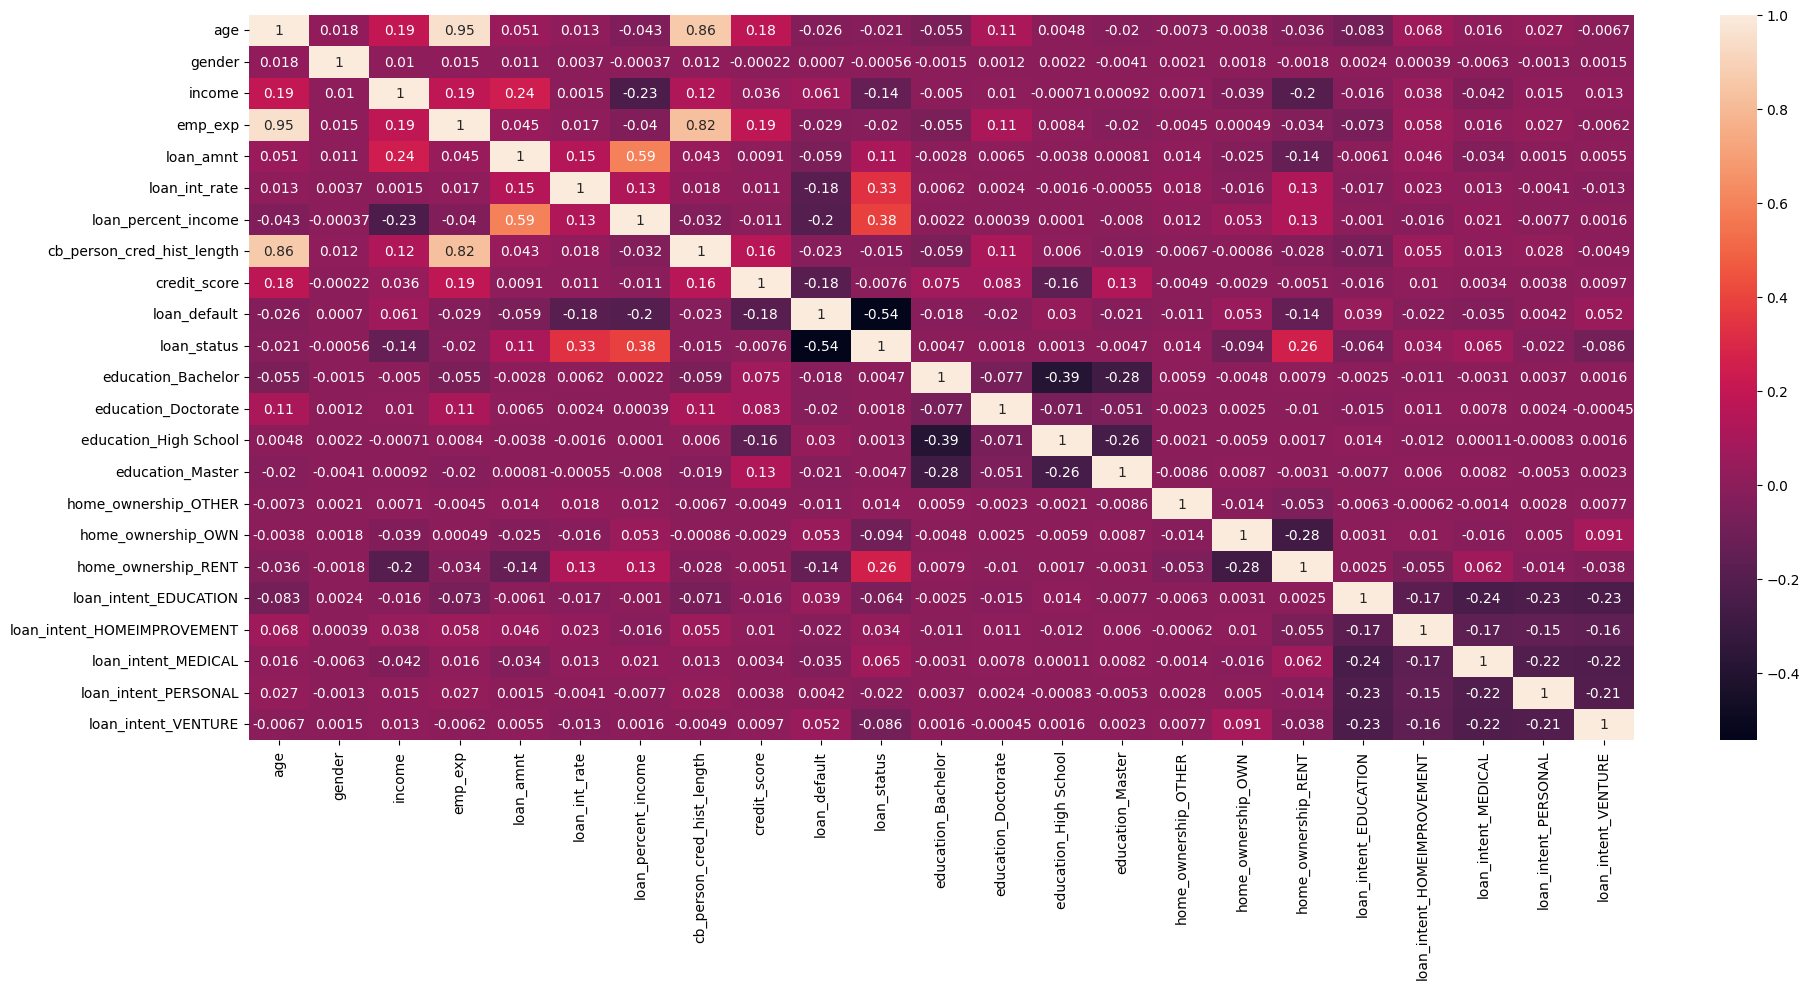

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(df_encoded.corr(numeric_only=True),annot=True)
plt.tight_layout()

In [75]:
df_encoded.columns

Index(['age', 'gender', 'income', 'emp_exp', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'loan_default', 'loan_status', 'education_Bachelor',
       'education_Doctorate', 'education_High School', 'education_Master',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

## Train and Test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
cols=['credit_score','loan_status']
x=df_encoded.drop(columns=cols)
y_ls=df_encoded['loan_status']

# Train test score split for predicting loan status
x_train, x_test, y_ls_train, y_ls_test = train_test_split(x, y_ls, test_size=0.20, random_state=42)

## **Creating model to predict Loan Status**

In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
model6=RandomForestClassifier()
model6.fit(x_train,y_ls_train)

RandomForestClassifier()

In [81]:
accuracy=accuracy_score(y_ls_test,model6.predict(x_test))
print("accuracy: ",accuracy)

f1=f1_score(y_ls_test,model6.predict(x_test))
print("f1 score: ",f1)

confusion_matrix(y_ls_test,model6.predict(x_test))

accuracy:  0.9287777777777778
f1 score:  0.8286554397219995


array([[6809,  181],
       [ 460, 1550]])

In [82]:
from sklearn.model_selection import cross_validate

In [83]:
model6_cv=cross_validate(model6,x_train,y_ls_train,cv=8, scoring=['accuracy','f1','precision'])

In [84]:
print("CV Accuracy: ", model6_cv['test_accuracy'].mean())
print("CV F1: ", model6_cv['test_f1'].mean())
print("CV precision: ",model6_cv['test_precision'].mean())

CV Accuracy:  0.9260833333333334
CV F1:  0.8196699461067096
CV precision:  0.8937324199460055
